In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
### row  = record
### column = attribute/dimension
###target = predicition


LOADING DATA FROM CSV FILE

In [31]:
cell_df=pd.read_csv('cell_samples.csv')
cell_df.head()
cell_df.shape
cell_df.size   ##gives size in bytes
cell_df.count()  ##column wise count of values avaialable in each column
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

DISTRIBUTION OF THE CLASSES

<Axes: xlabel='Clump', ylabel='UnifSize'>

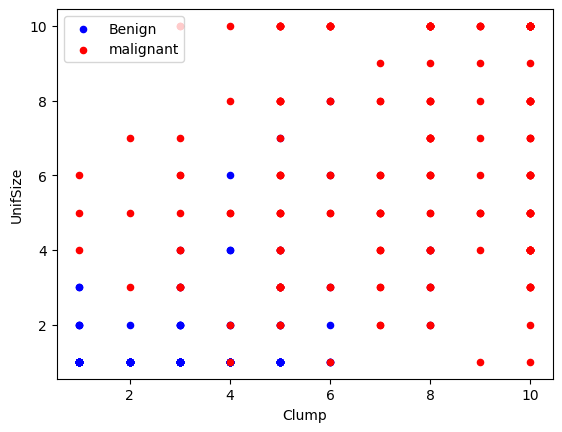

In [32]:
 benign_df = cell_df[cell_df['Class']==2][0:200]
 malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malignant_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='malignant',ax=axes)

IDENTIFYING UNWANTED ROWS

In [33]:
cell_df.dtypes
cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]  #coerce means all the values are forcefully converted to numeric type
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

<ipython-input-33-fe27ff2cf212>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

REMOVE UNWANTED COLUMNS


In [38]:
cell_df.columns
feature_df = cell_df[['Clump','UnifSize','UnifShape','MargAdh','SingEpiSize','BareNuc','BlandChrom','NormNucl','Mit']]

X= np.asarray(feature_df)

#cell of 100 rows and 11 columns  , out of that we are taking only 9 columns and all the rows

#Independent Var
X= np.asarray(feature_df)

#dependent variable
y=np.asarray(cell_df['Class'])

y[0:5]

array([2, 2, 2, 2, 2])

DIVIDING THE DATA AND AS TRAIN PART AND TEST PART


In [47]:
'''
cell_df(100) --> Train(80 rows) / Test (20 rows)

Train(x,y)  ## x is a 2d array , y is
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=4)   ##radnom_state = seed value
X_train.shape

y_train.shape

X_test.shape

y_test.shape

(137,)

In [45]:
##MODELLING (SVM and Scikit-learn)
from sklearn import svm
#gamma = kernel coefficient, c= peanlty cost on incorrect datapoints
classifier = svm.SVC(kernel='linear', gamma ='auto',C=2)
classifier.fit(X_train,y_train)
#predicting output

y_predict = classifier.predict(X_test)

#y_predict = classes predicted by the system

Evaluation (Results)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

